# **NVIDIA Stock Price Forecasting**
> 🤔 In this project we are going to develop a Deep Learning Model `NvidiaNET` that will be predicting on NVIDIA stock previous 20 years of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Loading, Exploring and Visualizing Data

In [3]:
df = pd.read_csv('NVDA.csv') 

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-08-25,1.550833,1.550833,1.500000,1.513333,1.388485,43402800
1,2003-08-26,1.494167,1.516667,1.448333,1.489167,1.366313,76898400
2,2003-08-27,1.499167,1.550000,1.483333,1.534167,1.407600,56781600
3,2003-08-28,1.549167,1.557500,1.476667,1.494167,1.370901,82831200
4,2003-08-29,1.491667,1.520833,1.485833,1.514167,1.389251,53288400


In [5]:
df.shape

(5035, 7)

In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5030,2023-08-18,426.350006,435.779999,416.600006,432.989990,432.989990,58262200
5031,2023-08-21,444.940002,470.649994,442.220001,469.670013,469.670013,69257300
5032,2023-08-22,481.350006,481.869995,453.329987,456.679993,456.679993,75720700
5033,2023-08-23,458.660004,472.000000,452.079987,471.160004,471.160004,77904600
5034,2023-08-24,502.160004,502.660004,471.589996,471.630005,471.630005,115274400


In [7]:
## convert our Date to datetime object
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-08-25,1.550833,1.550833,1.500000,1.513333,1.388485,43402800
1,2003-08-26,1.494167,1.516667,1.448333,1.489167,1.366313,76898400
2,2003-08-27,1.499167,1.550000,1.483333,1.534167,1.407600,56781600
3,2003-08-28,1.549167,1.557500,1.476667,1.494167,1.370901,82831200
4,2003-08-29,1.491667,1.520833,1.485833,1.514167,1.389251,53288400


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5035 non-null   datetime64[ns]
 1   Open       5035 non-null   float64       
 2   High       5035 non-null   float64       
 3   Low        5035 non-null   float64       
 4   Close      5035 non-null   float64       
 5   Adj Close  5035 non-null   float64       
 6   Volume     5035 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 275.5 KB


<Axes: title={'center': 'NVIDIA Stock Close Price'}>

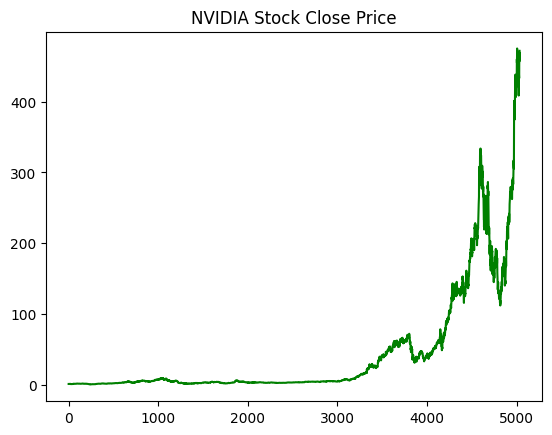

In [10]:
plt.grid()
df['Close'].plot(title='NVIDIA Stock Close Price', color='green')

In [11]:
X = df['Close']

In [12]:
X

0         1.513333
1         1.489167
2         1.534167
3         1.494167
4         1.514167
           ...    
5030    432.989990
5031    469.670013
5032    456.679993
5033    471.160004
5034    471.630005
Name: Close, Length: 5035, dtype: float64

In [13]:
X.shape

(5035,)

## MinMax Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(np.array(X).reshape(-1, 1))

In [15]:
X_scaled

array([[0.00153431],
       [0.00148334],
       [0.00157825],
       ...,
       [0.9614893 ],
       [0.99202791],
       [0.99301915]])

## Performing Training and Testing Splits

In [16]:
def time_series_splits(data, train_size:float):
  train_size = int(len(data)*train_size)
  train_data = data[:train_size]
  test_data = data[train_size:]
  return train_data, test_data

In [17]:
train_data, test_data = time_series_splits(X_scaled, 0.95)

In [18]:
train_data.shape, test_data.shape

((4783, 1), (252, 1))

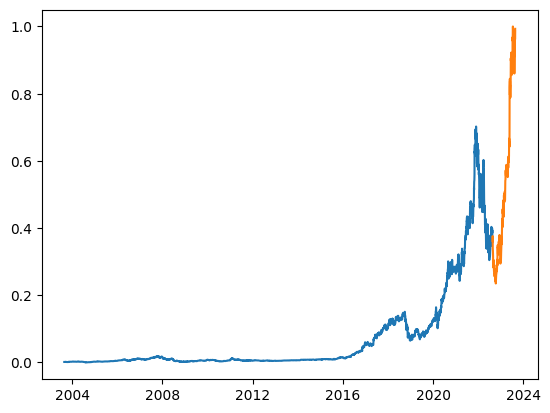

In [19]:
## visualizing our data
plt.plot(df['Date'][:4783], train_data)
plt.plot(df['Date'][4783:], test_data)

## Converting into Windows and Horizons
> We want to convert our data like this :
* [1, 2, 3, 4, 5, 6, 7] -> [8]
* [2, 3, 4, 5 ,6, 7, 8] -> [9]

In [20]:
def to_sequences(data, window_size=7, horizon=1):
  X = []
  y = []
  for i in range(len(data)-(window_size+horizon)):
    X.append(data[i:i+window_size, 0])
    y.append(data[i+window_size, 0])

  return np.array(X), np.array(y)

In [21]:
trainX, trainY = to_sequences(train_data, window_size=7, horizon=1)
testX, testY = to_sequences(test_data, window_size=7, horizon=1)

In [22]:
trainX.shape

(4775, 7)

In [23]:
trainX[0]

array([0.00153431, 0.00148334, 0.00157825, 0.00149389, 0.00153607,
       0.00150795, 0.00144644])

In [24]:
trainY[0]

0.0014763130765597045

In [25]:
print(f'Train X : {scaler.inverse_transform(trainX[-1].reshape(-1, 1))}')
print(f'Train Y : {scaler.inverse_transform(trainY[-1].reshape(-1, 1))}')

Train X : [[179.419998]
 [187.089996]
 [190.320007]
 [188.789993]
 [183.350006]
 [187.729996]
 [178.490005]]
Train Y : [[170.339996]]


In [26]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((4775, 7), (4775,), (244, 7), (244,))

In [27]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [28]:
trainX.shape, testX.shape

((4775, 1, 7), (244, 1, 7))

## Setting up callbacks

In [29]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [30]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Modelling Experiments

In [31]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Dropout

In [32]:
# Model 1
lstm_model = Sequential()
lstm_model.add(LSTM(128, activation='tanh', return_sequences=True))
lstm_model.add(LSTM(128, activation='tanh'))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(1, activation='linear'))

# compile model
lstm_model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mse']
)

In [33]:
history_lstm = lstm_model.fit(trainX, trainY,
                              epochs=50,
                              validation_data=(testX, testY),
                              callbacks=[create_tensorboard_callback(dir_name='NVIDIA STOCK Price',
                                                                     experiment_name='LSTM Model'),
                                         create_model_checkpoint(model_name='LSTM_model')])

Saving TensorBoard log files to: NVIDIA STOCK Price/LSTM Model/20230825-061924
Epoch 1/50
143/150 [===========================>..] - ETA: 0s - loss: 0.0023 - mse: 0.0023

150/150 [==============================] - 20s 64ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 9.3821e-04 - val_mse: 9.3821e-04
Epoch 2/50
150/150 [==============================] - 1s 6ms/step - loss: 1.0801e-04 - mse: 1.0801e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 3/50
150/150 [==============================] - 1s 6ms/step - loss: 8.2702e-05 - mse: 8.2702e-05 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4/50
150/150 [==============================] - 1s 6ms/step - loss: 8.3566e-05 - mse: 8.3566e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/50
148/150 [============================>.] - ETA: 0s - loss: 8.0026e-05 - mse: 8.0026e-05

150/150 [==============================] - 9s 60ms/step - loss: 7.9907e-05 - mse: 7.9907e-05 - val_loss: 7.0446e-04 - val_mse: 7.0446e-04
Epoch 6/50
150/150 [==============================] - 1s 7ms/step - loss: 7.0125e-05 - mse: 7.0125e-05 - val_loss: 8.2747e-04 - val_mse: 8.2747e-04
Epoch 7/50
149/150 [============================>.] - ETA: 0s - loss: 6.4326e-05 - mse: 6.4326e-05

150/150 [==============================] - 8s 55ms/step - loss: 6.4286e-05 - mse: 6.4286e-05 - val_loss: 6.1106e-04 - val_mse: 6.1106e-04
Epoch 8/50
150/150 [==============================] - 1s 9ms/step - loss: 5.6339e-05 - mse: 5.6339e-05 - val_loss: 6.7016e-04 - val_mse: 6.7016e-04
Epoch 9/50
150/150 [==============================] - 1s 8ms/step - loss: 6.5062e-05 - mse: 6.5062e-05 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 10/50
150/150 [==============================] - 1s 6ms/step - loss: 7.1782e-05 - mse: 7.1782e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 11/50
150/150 [==============================] - 1s 6ms/step - loss: 5.3265e-05 - mse: 5.3265e-05 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 12/50
150/150 [==============================] - ETA: 0s - loss: 7.2063e-05 - mse: 7.2063e-05

150/150 [==============================] - 8s 52ms/step - loss: 7.2063e-05 - mse: 7.2063e-05 - val_loss: 4.6568e-04 - val_mse: 4.6568e-04
Epoch 13/50
150/150 [==============================] - 1s 9ms/step - loss: 4.7660e-05 - mse: 4.7660e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 14/50
150/150 [==============================] - 1s 8ms/step - loss: 5.2552e-05 - mse: 5.2552e-05 - val_loss: 5.0385e-04 - val_mse: 5.0385e-04
Epoch 15/50
150/150 [==============================] - 1s 6ms/step - loss: 4.2803e-05 - mse: 4.2803e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 16/50
150/150 [==============================] - 1s 6ms/step - loss: 4.9423e-05 - mse: 4.9423e-05 - val_loss: 5.1206e-04 - val_mse: 5.1206e-04
Epoch 17/50
150/150 [==============================] - 1s 7ms/step - loss: 5.6216e-05 - mse: 5.6216e-05 - val_loss: 6.8195e-04 - val_mse: 6.8195e-04
Epoch 18/50
150/150 [==============================] - 1s 6ms/step - loss: 5.2525e-05 - mse: 5.2525e-05 - val_loss: 0.0018 - val_mse:

150/150 [==============================] - 10s 66ms/step - loss: 4.6867e-05 - mse: 4.6867e-05 - val_loss: 4.4563e-04 - val_mse: 4.4563e-04
Epoch 20/50
150/150 [==============================] - 1s 6ms/step - loss: 7.2885e-05 - mse: 7.2885e-05 - val_loss: 6.2439e-04 - val_mse: 6.2439e-04
Epoch 21/50
150/150 [==============================] - 1s 6ms/step - loss: 4.1117e-05 - mse: 4.1117e-05 - val_loss: 5.5894e-04 - val_mse: 5.5894e-04
Epoch 22/50
150/150 [==============================] - 1s 6ms/step - loss: 5.3428e-05 - mse: 5.3428e-05 - val_loss: 5.8845e-04 - val_mse: 5.8845e-04
Epoch 23/50
150/150 [==============================] - 1s 6ms/step - loss: 7.4127e-05 - mse: 7.4127e-05 - val_loss: 6.8743e-04 - val_mse: 6.8743e-04
Epoch 24/50
150/150 [==============================] - 1s 7ms/step - loss: 6.2937e-05 - mse: 6.2937e-05 - val_loss: 6.4406e-04 - val_mse: 6.4406e-04
Epoch 25/50
150/150 [==============================] - 1s 6ms/step - loss: 3.9179e-05 - mse: 3.9179e-05 - val_loss: 

In [34]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            69632     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 228,097
Trainable params: 228,097
Non-trai

## Evaluating our different Modelling Experiments

In [35]:
lstm_model.evaluate(testX, testY)

8/8 [==============================] - 0s 3ms/step - loss: 4.8772e-04 - mse: 4.8772e-04


[0.00048772181617096066, 0.00048772181617096066]

In [36]:
lstm_model = tf.keras.models.load_model('/content/model_experiments/LSTM_model')
lstm_model.evaluate(testX, testY)

8/8 [==============================] - 1s 5ms/step - loss: 4.4563e-04 - mse: 4.4563e-04


[0.00044562696712091565, 0.00044562696712091565]

In [37]:
lstm_model.evaluate(trainX, trainY)

150/150 [==============================] - 0s 3ms/step - loss: 4.3601e-05 - mse: 4.3601e-05


[4.360107413958758e-05, 4.360107413958758e-05]

In [38]:
y_preds = lstm_model.predict(testX)

8/8 [==============================] - 1s 3ms/step


In [39]:
train_y_preds = lstm_model.predict(trainX)

150/150 [==============================] - 0s 2ms/step


In [40]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy()}

In [41]:
evaluate_preds(testY, tf.squeeze(y_preds))

{'mae': 0.014787502,
 'mse': 0.00044562697,
 'rmse': 0.021109877,
 'mape': 2.9271536}

## Visualizing our data

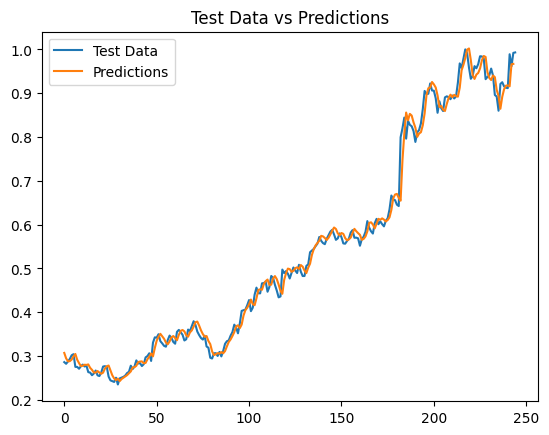

In [42]:
## visualizing our data
plt.plot(test_data[7:len(df)-(7+1)], label='Test Data')
plt.plot(y_preds, label='Predictions')
plt.legend()
plt.title('Test Data vs Predictions')
plt.show()

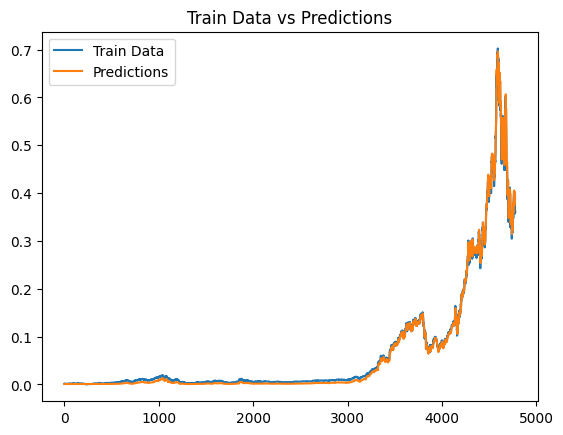

In [43]:
## visualizing our data
plt.plot(train_data[7:len(df)-(7+1)], label='Train Data')
plt.plot(train_y_preds, label='Predictions')
plt.legend()
plt.title('Train Data vs Predictions')
plt.show()

## Viewing our model's training results in TensorBoard

In [44]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./NVIDIA\ STOCK\ Price\
  --name "NVIDIA Stock Price Forecasting" \
  --description "Forecasts the Price of NVIDIA Stock" \
  --one_shot # exits the uploader when upload has finished

2023-08-25 06:21:16.720776: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./NVIDIA STOCK Price

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   GVQ-LQV-GBY



New experiment created. View your TensorBoard at: https://tensorboard.dev

## Future Forecasting

In [45]:
inputs = testX[-1]
inputs, inputs.shape

(array([[0.9211016 , 0.92504546, 0.9154705 , 0.91247572, 0.91152664,
         0.98888549, 0.9614893 ]]),
 (1, 7))

In [46]:
scaler.inverse_transform(testX[-1])

array([[437.529999, 439.399994, 434.859985, 433.440002, 432.98999 ,
        469.670013, 456.679993]])

In [47]:
inputs = testX[-1]
predictions = []
for i in range(30):
  print(f'Day {i}: \n Inputs (shape={inputs.shape}): \n {scaler.inverse_transform(inputs)}')
  y_preds = lstm_model.predict(tf.expand_dims(inputs, axis=0))
  # Perform the left shift and replace
  inputs[:, :-1] = inputs[:, 1:]
  inputs[:, -1] = y_preds
  predictions.append(tf.squeeze(scaler.inverse_transform(y_preds)))
  print(f'Outputs : \n {scaler.inverse_transform(y_preds)}')

Day 0: 
 Inputs (shape=(1, 7)): 
 [[437.529999 439.399994 434.859985 433.440002 432.98999  469.670013
  456.679993]]
1/1 [==============================] - 1s 615ms/step
Outputs : 
 [[459.23654]]
Day 1: 
 Inputs (shape=(1, 7)): 
 [[439.399994   434.859985   433.440002   432.98999    469.670013
  456.679993   459.23656403]]
1/1 [==============================] - 0s 18ms/step
Outputs : 
 [[461.97818]]
Day 2: 
 Inputs (shape=(1, 7)): 
 [[434.859985   433.440002   432.98999    469.670013   456.679993
  459.23656403 461.97818383]]
1/1 [==============================] - 0s 20ms/step
Outputs : 
 [[462.86993]]
Day 3: 
 Inputs (shape=(1, 7)): 
 [[433.440002   432.98999    469.670013   456.679993   459.23656403
  461.97818383 462.86995638]]
1/1 [==============================] - 0s 19ms/step
Outputs : 
 [[464.66513]]
Day 4: 
 Inputs (shape=(1, 7)): 
 [[432.98999    469.670013   456.679993   459.23656403 461.97818383
  462.86995638 464.66514533]]
1/1 [==============================] - 0s 19ms/ste

In [49]:
predictions = np.array(predictions)

In [50]:
predictions, predictions.shape

(array([459.23654, 461.97818, 462.86993, 464.66513, 465.25806, 462.317  ,
        462.3411 , 461.00424, 459.3158 , 457.6375 , 455.5953 , 453.5442 ,
        451.70404, 449.63815, 447.6807 , 445.79474, 443.9667 , 442.25793,
        440.6474 , 439.1272 , 437.7342 , 436.44733, 435.26892, 434.19855,
        433.22733, 432.3525 , 431.5694 , 430.8694 , 430.2478 , 429.69815],
       dtype=float32),
 (30,))

In [51]:
today = np.datetime64(datetime.date.today())
date_array = today + np.arange(30)

In [52]:
date_array

array(['2023-08-25', '2023-08-26', '2023-08-27', '2023-08-28',
       '2023-08-29', '2023-08-30', '2023-08-31', '2023-09-01',
       '2023-09-02', '2023-09-03', '2023-09-04', '2023-09-05',
       '2023-09-06', '2023-09-07', '2023-09-08', '2023-09-09',
       '2023-09-10', '2023-09-11', '2023-09-12', '2023-09-13',
       '2023-09-14', '2023-09-15', '2023-09-16', '2023-09-17',
       '2023-09-18', '2023-09-19', '2023-09-20', '2023-09-21',
       '2023-09-22', '2023-09-23'], dtype='datetime64[D]')

In [53]:
predictions.shape, test_data.shape

((30,), (252, 1))

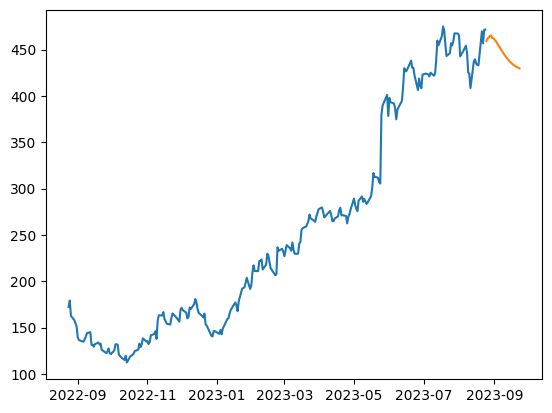

In [54]:
# Visualizing our Future 30 Days predictions
plt.plot(df['Date'][-252:], tf.squeeze(scaler.inverse_transform(test_data)))
plt.plot(date_array, tf.squeeze(predictions))

## Saving our model

In [55]:
lstm_model.save('NVIDIA_lstm_model.h5')

In [57]:
import pickle
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)